In [2]:
import torch
tacotron2 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_tacotron2', model_math='fp16')
tacotron2 = tacotron2.to('cuda')
tacotron2.eval()

/usr/local/lib/python3.8/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(

Tacotron2(
  (embedding): Embedding(148, 512)
  (encoder): Encoder(
    (convolutions): ModuleList(
      (0-2): 3 x Sequential(
        (0): ConvNorm(
          (conv): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=(2,))
        )
        (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (lstm): LSTM(512, 256, batch_first=True, bidirectional=True)
  )
  (decoder): Decoder(
    (prenet): Prenet(
      (layers): ModuleList(
        (0): LinearNorm(
          (linear_layer): Linear(in_features=80, out_features=256, bias=False)
        )
        (1): LinearNorm(
          (linear_layer): Linear(in_features=256, out_features=256, bias=False)
        )
      )
    )
    (attention_rnn): LSTMCell(768, 1024)
    (attention_layer): Attention(
      (query_layer): LinearNorm(
        (linear_layer): Linear(in_features=1024, out_features=128, bias=False)
      )
      (memory_layer): LinearNorm(
        (linear_layer): Linear(in_fea

In [3]:
waveglow = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_waveglow', model_math='fp16')
waveglow = waveglow.remove_weightnorm(waveglow)
waveglow = waveglow.to('cuda')
waveglow.eval()

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


WaveGlow(
  (upsample): ConvTranspose1d(80, 80, kernel_size=(1024,), stride=(256,))
  (WN): ModuleList(
    (0-3): 4 x WN(
      (in_layers): ModuleList(
        (0): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(2,), dilation=(2,))
        (2): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(4,), dilation=(4,))
        (3): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(8,), dilation=(8,))
        (4): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(16,), dilation=(16,))
        (5): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(32,), dilation=(32,))
        (6): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(64,), dilation=(64,))
        (7): Conv1d(512, 1024, kernel_size=(3,), stride=(1,), padding=(128,), dilation=(128,))
      )
      (res_skip_layers): ModuleList(
        (0-6): 7 x Conv1d(512, 1024, kernel_size=(1,), stride=(1,))
        (7

In [57]:
text = "Hello world, I missed you so much."
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io.wavfile import write

In [5]:
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_tts_utils')
sequences, lengths = utils.prepare_input_sequence([text])

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/SpeechSynthesis/Tacotron2/tacotron2/text/__init__.py:74: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return s in _symbol_to_id and s is not '_' and s is not '~'
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/SpeechSynthesis/Tacotron2/tacotron2/text/__init__.py:74: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return s in _symbol_to_id and s is not '_' and s is not '~'


a
b
c
H
I
J
K
L
22222222 hello 22222222
S D S D Pass zero - zero Fail - zero to zero - zero - zero Cancelled - fifty nine to three - two - ixty four Total - fifty nine to three - two -
Warning! Reached max decoder steps
S D S D Pass - zero - zero - zero - zero Fail - zero - zero - zero - zero Cancelled - four hundred nd sixteen - seventy six -
Warning! Reached max decoder steps
zero - one - one - two Cancelled - zero - zero - zero - zero Total - two hundred and eighty six - ineteen - seven -
Warning! Reached max decoder steps
forty one to five three hundred and eleven Fail - one - one to zero two Cancelled - zero - zero to ero zero Total -
zero zero one , MS03 - zero twenty five , MS03 - zero thirty two , MS03 - zero thirty nine ,
1b204928 zero zero zero zero zero zero zero zero zero zero zero zero zero zero one seven ole32
zero zero zero zero zero zero zero zero two seven nine eight F three forty zero zero zero zero zero ix four two eight zero one eight
c five eight zero three three n

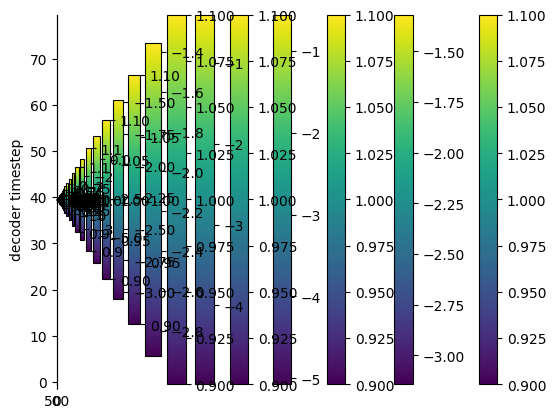

In [58]:
for i,line in enumerate(lines):
    text=line
    print(text)
    sequences, lengths = utils.prepare_input_sequence([text])
    with torch.no_grad():
        mel,mel_lengths, alignments  = tacotron2.infer(sequences, lengths)
        plt.imshow(alignments.cpu().numpy()[0].T,aspect='auto',origin='lower',interpolation='none')    
        plt.colorbar()
        #plt.show()
        plt.savefig(f"./data/{i}_align.png")
        plt.ylabel("encoder timestep")
        plt.imshow(mel.cpu().numpy()[0],aspect='auto',origin='lower',interpolation='none')
        plt.ylabel("decoder timestep")
        plt.colorbar()    
        #plt.show()
        plt.savefig(f"./data/{i}_spec.png")
        #print(mel_lengths.item())
        
        audio = waveglow.infer(mel)
        audio_numpy = audio[0].data.cpu().numpy()
        rate = 22050
        write(f"./data/{i}.wav", rate, audio_numpy)

    
    
   
    


In [17]:
lines = *map(str.strip,open("./untitled.txt",'r',encoding='utf-8').readlines()),

In [19]:
lines[1]

'b'